In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import sklearn.metrics

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import precision_recall_fscore_support,roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate

from sklearn.metrics import roc_curve, auc, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')


In [2]:
data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sismo/soma_erman.xlsx')
data1.head()

,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),ML,Tip,Yer,Amp Ratio,log S,C,SR,Kaynak
0,2020-01-21,03:55:09.37,39.4615,27.9038,9.4,1.9,Ke,TASKOY- (BALIKESIR) [South East 2.1 km],2.066776,2.830054,3.373663,3.809237,0
1,2020-01-20,19:05:23.00,39.0463,27.8650,15.2,2.4,Ke,MUSALAR-AKHISAR (MANISA) [North East 2.0 km],2.329526,3.761550,7.534560,2.340555,0
2,2020-01-20,14:47:38.70,39.0445,27.8713,6.0,2.2,Ke,MUSALAR-AKHISAR (MANISA) [North East 2.4 km],2.064209,3.357225,4.131264,4.175379,0
3,2020-01-20,03:54:35.18,39.0550,27.8527,8.8,2.4,Ke,MUSALAR-AKHISAR (MANISA) [North East 2.3 km],7.326536,4.331210,32.183552,7.334803,0
4,2020-01-19,20:22:33.31,39.0425,27.8460,5.2,1.6,Ke,MUSALAR-AKHISAR (MANISA) [North 0.8 km],2.041486,3.177086,4.147976,6.284482,0


In [3]:
data2=data1.drop(columns=["Olus tarihi","Olus zamani","Enlem", "Boylam", "Der(km)","ML","Tip","Yer"])
data2.head()

,Amp Ratio,log S,C,SR,Kaynak
0,2.066776,2.830054,3.373663,3.809237,0
1,2.329526,3.761550,7.534560,2.340555,0
2,2.064209,3.357225,4.131264,4.175379,0
3,7.326536,4.331210,32.183552,7.334803,0
4,2.041486,3.177086,4.147976,6.284482,0


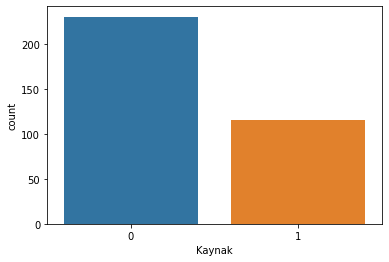

In [4]:
ax = sns.countplot(x="Kaynak", data=data2)

In [5]:
count_class_1, count_class_2 = data2.Kaynak.value_counts()

data_11 = data2[data2['Kaynak'] == 0]
data_12 = data2[data2['Kaynak'] == 1]

In [6]:
count_class_1

230

In [7]:
count_class_2

115

In [8]:
data_12_over = data_12.sample(count_class_1, replace=True)


data2_over = pd.concat([data_11 , data_12_over], axis=0)

print('Random over-sampling:')
print(data2_over.Kaynak.value_counts())

Random over-sampling:
0    230
1    230
Name: Kaynak, dtype: int64


In [9]:
data2=data2_over

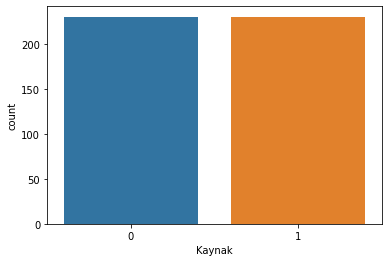

In [10]:
ax = sns.countplot(x="Kaynak", data=data2)

In [11]:
X = data2.iloc[:,0:4].values  # Independent variables
y = data2['Kaynak'].values  # Dependent variable

In [12]:
column_names = data2.iloc[:,0:4].columns
column_names

Index(['Amp Ratio', 'log S', 'C', 'SR'], dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, stratify=y, random_state=42)

In [14]:
y_train.shape

(322,)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
pred_prob = rf.predict_proba(X_test)

In [16]:
rf_ts= rf.score(X_train,y_train)
rf_accu=accuracy_score(y_test, pred)
rf_mac_p = precision_score(y_test, pred, average = 'macro')
rf_mic_p = precision_score(y_test, pred, average = 'micro')
rf_mac_r = recall_score(y_test, pred, average = 'macro')
rf_mic_r = recall_score(y_test, pred, average = 'micro')
rf_mac_f1 = f1_score(y_test, pred, average = 'macro')
rf_mic_f1 = f1_score(y_test, pred, average = 'micro')
rf_kappa = cohen_kappa_score(y_test,pred)

[[67  2]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        69

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



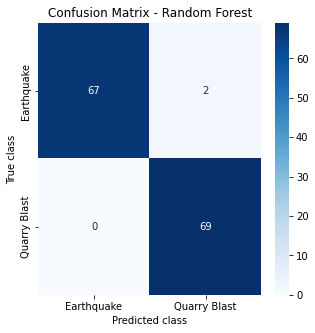

In [17]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 

df_cm_rf= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix - Random Forest')

sns.heatmap(df_cm_rf, annot = True, fmt='g', cmap='Blues')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [18]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
pred = gb.predict(X_test)
pred_prob = gb.predict_proba(X_test)

In [19]:
gb_ts= gb.score(X_train,y_train)
gb_accu=accuracy_score(y_test, pred)
gb_mac_p = precision_score(y_test, pred, average = 'macro')
gb_mic_p = precision_score(y_test, pred, average = 'micro')
gb_mac_r = recall_score(y_test, pred, average = 'macro')
gb_mic_r = recall_score(y_test, pred, average = 'micro')
gb_mac_f1 = f1_score(y_test, pred, average = 'macro')
gb_mic_f1 = f1_score(y_test, pred, average = 'micro')
gb_kappa = cohen_kappa_score(y_test,pred)

[[66  3]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.96      1.00      0.98        69

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



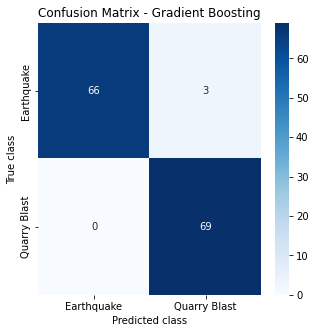

In [20]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 

df_cm_gb= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix - Gradient Boosting')

sns.heatmap(df_cm_gb, annot = True, fmt='g', cmap='Blues')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [21]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)
pred_prob = mlp.predict_proba(X_test)

In [22]:
mlp_ts= mlp.score(X_train,y_train)
mlp_accu=accuracy_score(y_test, pred)
mlp_mac_p = precision_score(y_test, pred, average = 'macro')
mlp_mic_p = precision_score(y_test, pred, average = 'micro')
mlp_mac_r = recall_score(y_test, pred, average = 'macro')
mlp_mic_r = recall_score(y_test, pred, average = 'micro')
mlp_mac_f1 = f1_score(y_test, pred, average = 'macro')
mlp_mic_f1 = f1_score(y_test, pred, average = 'micro')
mlp_kappa = cohen_kappa_score(y_test,pred)

[[67  2]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        69

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



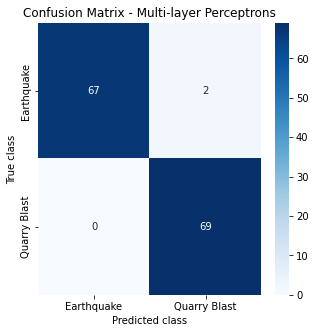

In [23]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 

df_cm_mlp= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix - Multi-layer Perceptrons')

sns.heatmap(df_cm_mlp, annot = True, fmt='g', cmap='Blues')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred_prob = knn.predict_proba(X_test)

In [25]:
knn_ts= knn.score(X_train,y_train)
knn_accu=accuracy_score(y_test, pred)
knn_mac_p = precision_score(y_test, pred, average = 'macro')
knn_mic_p = precision_score(y_test, pred, average = 'micro')
knn_mac_r = recall_score(y_test, pred, average = 'macro')
knn_mic_r = recall_score(y_test, pred, average = 'micro')
knn_mac_f1 = f1_score(y_test, pred, average = 'macro')
knn_mic_f1 = f1_score(y_test, pred, average = 'micro')
knn_kappa = cohen_kappa_score(y_test,pred)

[[65  4]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        69
           1       0.95      1.00      0.97        69

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138



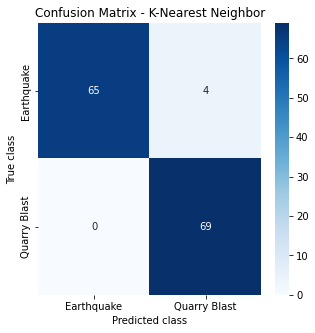

In [26]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 

df_cm_knn= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix - K-Nearest Neighbor')

sns.heatmap(df_cm_knn, annot = True, fmt='g', cmap='Blues')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_prob = lr.predict_proba(X_test)

In [28]:
lr_ts= lr.score(X_train,y_train)
lr_accu=accuracy_score(y_test, pred)
lr_mac_p = precision_score(y_test, pred, average = 'macro')
lr_mic_p = precision_score(y_test, pred, average = 'micro')
lr_mac_r = recall_score(y_test, pred, average = 'macro')
lr_mic_r = recall_score(y_test, pred, average = 'micro')
lr_mac_f1 = f1_score(y_test, pred, average = 'macro')
lr_mic_f1 = f1_score(y_test, pred, average = 'micro')
lr_kappa = cohen_kappa_score(y_test,pred)

[[66  3]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.96      1.00      0.98        69

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



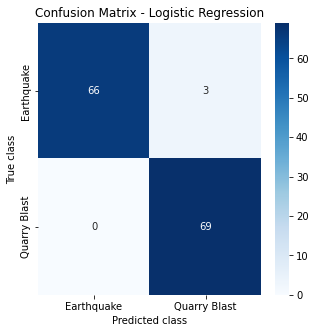

In [29]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 

df_cm_lr= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix - Logistic Regression')

sns.heatmap(df_cm_lr, annot = True, fmt='g', cmap='Blues')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [30]:
abb = AdaBoostClassifier(DecisionTreeClassifier(random_state=2))
abb.fit(X_train, y_train)
pred = abb.predict(X_test)
pred_prob = abb.predict_proba(X_test)

In [31]:
abb_ts= abb.score(X_train,y_train)
ab_accu=accuracy_score(y_test, pred)
ab_mac_p = precision_score(y_test, pred, average = 'macro')
ab_mic_p = precision_score(y_test, pred, average = 'micro')
ab_mac_r = recall_score(y_test, pred, average = 'macro')
ab_mic_r = recall_score(y_test, pred, average = 'micro')
ab_mac_f1 = f1_score(y_test, pred, average = 'macro')
ab_mic_f1 = f1_score(y_test, pred, average = 'micro')
ab_kappa = cohen_kappa_score(y_test,pred)

[[66  3]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.96      1.00      0.98        69

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



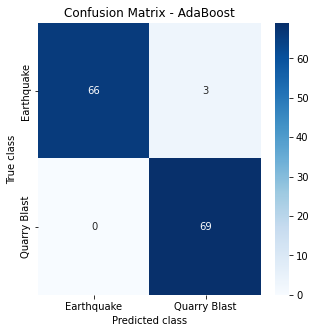

In [32]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 

df_cm_ab= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix - AdaBoost')

sns.heatmap(df_cm_ab, annot = True, fmt='g', cmap='Blues')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [33]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
pred_prob = xgb.predict_proba(X_test)

In [34]:
xgb_ts= xgb.score(X_train,y_train)
xgb_accu=accuracy_score(y_test, pred)
xgb_mac_p = precision_score(y_test, pred, average = 'macro')
xgb_mic_p = precision_score(y_test, pred, average = 'micro')
xgb_mac_r = recall_score(y_test, pred, average = 'macro')
xgb_mic_r = recall_score(y_test, pred, average = 'micro')
xgb_mac_f1 = f1_score(y_test, pred, average = 'macro')
xgb_mic_f1 = f1_score(y_test, pred, average = 'micro')
xgb_kappa = cohen_kappa_score(y_test,pred)

[[67  2]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        69

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



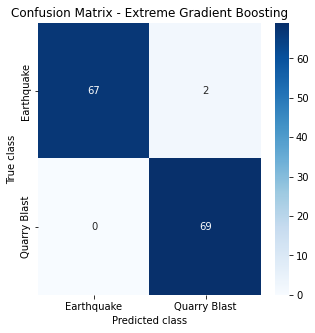

In [35]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 

df_cm_xgb= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix - Extreme Gradient Boosting')

sns.heatmap(df_cm_xgb, annot = True, fmt='g', cmap='Blues')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [36]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
pred_prob = svm.predict_proba(X_test)

In [37]:
svm_ts= svm.score(X_train,y_train)
svm_accu=accuracy_score(y_test, pred)
svm_mac_p = precision_score(y_test, pred, average = 'macro')
svm_mic_p = precision_score(y_test, pred, average = 'micro')
svm_mac_r = recall_score(y_test, pred, average = 'macro')
svm_mic_r = recall_score(y_test, pred, average = 'micro')
svm_mac_f1 = f1_score(y_test, pred, average = 'macro')
svm_mic_f1 = f1_score(y_test, pred, average = 'micro')
svm_kappa = cohen_kappa_score(y_test,pred)

[[64  5]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        69
           1       0.93      1.00      0.97        69

    accuracy                           0.96       138
   macro avg       0.97      0.96      0.96       138
weighted avg       0.97      0.96      0.96       138



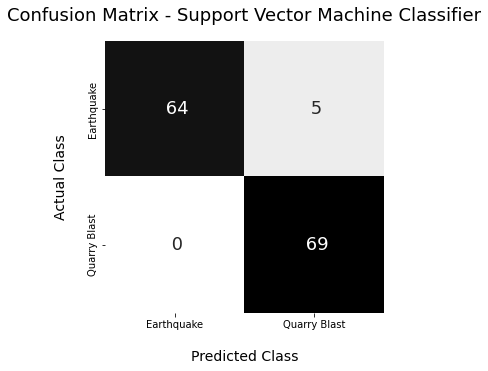

In [38]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) 
sns.axes_style('white')

df_cm_svm= pd.DataFrame(confusion_matrix(y_test, pred), index = [i for i in ["Earthquake", "Quarry Blast"]],
                  columns = [i for i in ["Earthquake", "Quarry Blast"]])
plt.figure(figsize = (5,5))

plt.title('Confusion Matrix - Support Vector Machine Classifier', size = 18, pad=20)

sns.heatmap(df_cm_svm, annot = True, annot_kws={"size": 18}, fmt=' ', cmap='binary', cbar=False)
plt.ylabel('Actual Class', size=14, labelpad=20)
plt.xlabel('Predicted Class', size=14, labelpad=20)
plt.show()

In [54]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, roc_curve, roc_auc_score, auc,precision_recall_curve, average_precision_score
y_pred_prob_svc = svm.predict_proba(X_test)[:,1]
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
y_pred_prob_gb = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

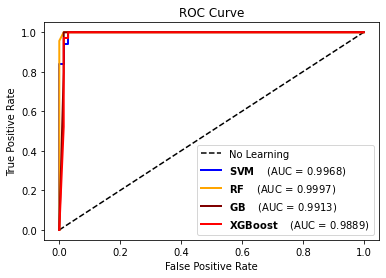

In [55]:
plt.plot([0, 1], [0, 1], 'k--', label = "No Learning")
plt.plot(fpr_svc, tpr_svc, label=r'$\bf{}$'.format('SVM')+ '    (AUC = %0.4f)' % roc_auc_svc, color='b', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=r'$\bf{}$'.format('RF')+ '    (AUC = %0.4f)' % roc_auc_rf,  color='orange', linewidth=2)
plt.plot(fpr_gb, tpr_gb, label=r'$\bf{}$'.format('GB')+ '    (AUC = %0.4f)' % roc_auc_gb,  color='maroon', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=r'$\bf{}$'.format('XGBoost')+ '    (AUC = %0.4f)' % roc_auc_xgb,  color='r', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [57]:
models_initial = pd.DataFrame({
    'Algorithm'       : ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting ', 'AdaBoost', 'Multi-layer Perceptron', 'K-Nearest Neighbor', 'Extreme Gradient Boosting'],
    'Training Accuracy'   : [lr_ts,svm_ts,rf_ts,gb_ts,abb_ts,mlp_ts,knn_ts,xgb_ts],
    'Testing Accuracy'    : [lr_accu,svm_accu,rf_accu,gb_accu,ab_accu,mlp_accu,knn_accu,xgb_accu],
    'Precision (Macro)'   : [lr_mac_p,svm_mac_p,rf_mac_p,gb_mac_p,ab_mac_p,mlp_mac_p,knn_mac_p,xgb_mac_p],
    'Precision (Micro)'   : [lr_mic_p,svm_mic_p,rf_mic_p,gb_mic_p,ab_mic_p,mlp_mic_p,knn_mic_p,xgb_mic_p],
    'Recall (Macro)'      : [lr_mac_r,svm_mac_r,rf_mac_r,gb_mac_r,ab_mac_r,mlp_mac_r,knn_mac_r,xgb_mac_r],
    'Recall (Micro)'      : [lr_mic_r,svm_mic_r,rf_mic_r,gb_mic_r,ab_mic_r,mlp_mic_r,knn_mic_r,xgb_mic_r],
    'F1 score (Macro)'    : [lr_mac_f1,svm_mac_f1,rf_mac_f1,gb_mac_f1,ab_mac_f1,mlp_mac_f1,knn_mac_f1,xgb_mac_f1],
    'F1 score (Micro)'    : [lr_mic_f1,svm_mic_f1,rf_mic_f1,gb_mic_f1,ab_mic_f1,mlp_mic_f1,knn_mic_f1,xgb_mic_f1],
    "Cohen Kappa Score": [lr_kappa,svm_kappa,rf_kappa,gb_kappa,ab_kappa,mlp_kappa,knn_kappa,xgb_kappa]
    }, columns = ['Algorithm', 'Training Accuracy','Testing Accuracy', 'Precision (Macro)','Precision (Micro)', 'Recall (Macro)', 'Recall (Micro)', 'F1 score (Macro)','F1 score (Micro)', "Cohen Kappa Score"])

models_initial.sort_values(by='Testing Accuracy', ascending=False)

,Algorithm,Training Accuracy,Testing Accuracy,Precision (Macro),Precision (Micro),Recall (Macro),Recall (Micro),F1 score (Macro),F1 score (Micro),Cohen Kappa Score
2,Random Forest,1.000000,0.985507,0.985915,0.985507,0.985507,0.985507,0.985504,0.985507,0.971014
5,Multi-layer Perceptron,0.987578,0.985507,0.985915,0.985507,0.985507,0.985507,0.985504,0.985507,0.971014
7,Extreme Gradient Boosting,1.000000,0.985507,0.985915,0.985507,0.985507,0.985507,0.985504,0.985507,0.971014
0,Logistic Regression,0.987578,0.978261,0.979167,0.978261,0.978261,0.978261,0.978251,0.978261,0.956522
3,Gradient Boosting,1.000000,0.978261,0.979167,0.978261,0.978261,0.978261,0.978251,0.978261,0.956522
4,AdaBoost,1.000000,0.978261,0.979167,0.978261,0.978261,0.978261,0.978251,0.978261,0.956522
6,K-Nearest Neighbor,0.987578,0.971014,0.972603,0.971014,0.971014,0.971014,0.970990,0.971014,0.942029
1,Support Vector Machine,0.978261,0.963768,0.966216,0.963768,0.963768,0.963768,0.963720,0.963768,0.927536


#PREDICT

In [58]:
data3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sismo/soma_2.xlsx')
data3.head()

,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),ML,Tip,Yer,Amp Ratio,log S,C,SR,Tahmin,Kandilli
0,2021-06-17,08:26:43.57,39.1658,27.5893,0,1.0,Sm,DARKALE-SOMA (MANISA) [North West 0.9 km],6.059489,4.611644,37.142258,0.260007,Deprem,Patlatma
1,2021-06-10,06:30:40.08,39.1617,27.7543,0,1.5,Sm,KUCUKYAYA-KIRKAGAC (MANISA) [South East 0.7 km],5.927914,3.961794,1.144001,3.711673,Deprem,Patlatma
2,2021-06-07,09:32:20.80,39.0800,27.6112,0,1.1,Sm,CIFTLIK-KIRKAGAC (MANISA) [North West 1.8 km],1.562154,3.502294,1.846764,1.408324,???,Patlatma
3,2021-06-03,07:44:54.51,39.1705,27.6358,0,1.8,Sm,SARIKAYA-SOMA (MANISA) [North West 2.6 km],2.927857,3.827745,0.844252,0.038978,???,Patlatma
4,2021-03-27,08:55:46.23,39.0950,27.5447,0,1.7,Sm,DEREKOY-SOMA (MANISA) [South East 3.1 km],1.308097,3.560176,0.954326,0.685784,???,Patlatma


In [59]:
data4=data3.drop(columns=["Olus tarihi","Olus zamani","Enlem", "Boylam", "Der(km)","ML","Tip","Yer", "Tahmin","Kandilli"])
data4.head()

,Amp Ratio,log S,C,SR
0,6.059489,4.611644,37.142258,0.260007
1,5.927914,3.961794,1.144001,3.711673
2,1.562154,3.502294,1.846764,1.408324
3,2.927857,3.827745,0.844252,0.038978
4,1.308097,3.560176,0.954326,0.685784


In [60]:
pred_rf = rf.predict(data4.to_numpy())
pred_svm = svm.predict(data4.to_numpy())
pred_gb = gb.predict(data4.to_numpy())
pred_xgb = xgb.predict(data4.to_numpy())

In [61]:
data3['predicted_class_RF'] = pred_rf.tolist()
data3['predicted_class_SVM'] = pred_svm.tolist()
data3['predicted_class_GB'] = pred_gb.tolist()
data3['predicted_class_XGB'] = pred_xgb.tolist()
data3.head()

,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),ML,Tip,Yer,Amp Ratio,log S,C,SR,Tahmin,Kandilli,predicted_class_RF,predicted_class_SVM,predicted_class_GB,predicted_class_XGB
0,2021-06-17,08:26:43.57,39.1658,27.5893,0,1.0,Sm,DARKALE-SOMA (MANISA) [North West 0.9 km],6.059489,4.611644,37.142258,0.260007,Deprem,Patlatma,0,0,0,0
1,2021-06-10,06:30:40.08,39.1617,27.7543,0,1.5,Sm,KUCUKYAYA-KIRKAGAC (MANISA) [South East 0.7 km],5.927914,3.961794,1.144001,3.711673,Deprem,Patlatma,1,1,1,1
2,2021-06-07,09:32:20.80,39.0800,27.6112,0,1.1,Sm,CIFTLIK-KIRKAGAC (MANISA) [North West 1.8 km],1.562154,3.502294,1.846764,1.408324,???,Patlatma,1,1,1,1
3,2021-06-03,07:44:54.51,39.1705,27.6358,0,1.8,Sm,SARIKAYA-SOMA (MANISA) [North West 2.6 km],2.927857,3.827745,0.844252,0.038978,???,Patlatma,1,1,1,1
4,2021-03-27,08:55:46.23,39.0950,27.5447,0,1.7,Sm,DEREKOY-SOMA (MANISA) [South East 3.1 km],1.308097,3.560176,0.954326,0.685784,???,Patlatma,1,1,1,1


In [62]:
file_name = 'soma_2_classified.xlsx'
data3.to_excel(file_name)